# Optimization Methods
Từ trước đến nay, bạn vẫn luôn sử dụng Gradient Descent để cập nhật các thông số và giảm thiểu chi phí. Trong sổ tay này, bạn sẽ có được các kỹ năng với một số phương pháp tối ưu hóa nâng cao hơn có thể tăng tốc độ học và thậm chí có thể đưa bạn đến giá trị cuối cùng tốt hơn cho hàm chi phí. Có một thuật toán tối ưu hóa tốt có thể là sự khác biệt giữa số ngày chờ đợi so với chỉ vài giờ để có được kết quả tốt.

Vào cuối sổ tay này, bạn sẽ có thể:
* Áp dụng các phương pháp tối ưu hóa như (Stochastic) Gradient Descent, Momentum, RMSProp và Adam
* Sử dụng các minibatch ngẫu nhiên để tăng tốc độ hội tụ và cải thiện tối ưu hóa


**Kí hiệu**: Như thường lệ,  $\frac{\partial J}{\partial a } = $ `da` cho bất kỳ biến nào` a`.

Bắt đầu nào!

## Table of Contents
- [1- Packages](#1)
- [2 - Gradient Descent](#2)
    - [Exercise 1 - update_parameters_with_gd](#ex-1)
- [3 - Mini-Batch Gradient Descent](#3)
    - [Exercise 2 - random_mini_batches](#ex-2)
- [4 - Momentum](#4)
    - [Exercise 3 - initialize_velocity](#ex-3)
    - [Exercise 4 - update_parameters_with_momentum](#ex-4)
- [5 - Adam](#5)
    - [Exercise 5 - initialize_adam](#ex-5)
    - [Exercise 6 - update_parameters_with_adam](#ex-6)
- [6 - Model with different Optimization algorithms](#6)
    - [6.1 - Mini-Batch Gradient Descent](#6-1)
    - [6.2 - Mini-Batch Gradient Descent with Momentum](#6-2)
    - [6.3 - Mini-Batch with Adam](#6-3)
    - [6.4 - Summary](#6-4)
- [7 - Learning Rate Decay and Scheduling](#7)
    - [7.1 - Decay on every iteration](#7-1)
        - [Exercise 7 - update_lr](#ex-7)
    - [7.2 - Fixed Interval Scheduling](#7-2)
        - [Exercise 8 - schedule_lr_decay](#ex-8)
    - [7.3 - Using Learning Rate Decay for each Optimization Method](#7-3)
        - [7.3.1 - Gradient Descent with Learning Rate Decay](#7-3-1)
        - [7.3.2 - Gradient Descent with Momentum and Learning Rate Decay](#7-3-2)
        - [7.3.3 - Adam with Learning Rate Decay](#7-3-3)
    - [7.4 - Achieving similar performance with different methods](#7-4)

<a name='1'></a>
## 1- Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from copy import deepcopy
from testCase1 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<a name='2'></a>
## 2 - Gradient Descent
Một phương pháp tối ưu hóa đơn giản trong học máy là gradient descent (GD). Khi bạn thực hiện các bước gradient đối với tất cả các ví dụ $ m $ trên mỗi bước, nó còn được gọi là Batch Gradient Descent.

<a name='ex-1'></a>
### Exercise 1 - update_parameters_with_gd
Thực hiện quy tắc cập nhật dốc xuống. Quy tắc giảm độ dốc là, đối với $ l = 1, ..., L $:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$
trong đó L là số lớp và $ \alpha $ là tốc độ học. Tất cả các tham số nên được lưu trữ trong từ điển `parameters`. Lưu ý rằng trình lặp `l` bắt đầu từ 1 trong vòng lặp` for` vì các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $.


In [2]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(1, L + 1):
        # (approx. 2 lines)
        parameters["W" + str(l)] =  parameters["W" + str(l)] - learning_rate*grads['dW' + str(l)]
        parameters["b" + str(l)] =  parameters["b" + str(l)] - learning_rate*grads['db' + str(l)] 
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
    return parameters

In [3]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
learning_rate = 0.01
parameters = update_parameters_with_gd(parameters, grads, learning_rate)

print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))



W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 =
[[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


Một biến thể của điều này là Stochastic Gradient Descent (SGD), tương đương với độ dốc gradient theo lô nhỏ, trong đó mỗi lô nhỏ chỉ có 1 ví dụ. Quy tắc cập nhật mà bạn vừa thực hiện không thay đổi. Điều thay đổi là bạn sẽ chỉ tính toán các điểm nâng cấp trên một ví dụ đào tạo tại một thời điểm, thay vì trên toàn bộ tập hợp đào tạo. Các ví dụ mã bên dưới minh họa sự khác biệt giữa giảm độ dốc ngẫu nhiên và giảm độ dốc (hàng loạt).

- **(Batch) Gradient Descent**:
``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost += compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```


- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost += compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


Trong Stochastic Gradient Descent, bạn chỉ sử dụng 1 ví dụ đào tạo trước khi cập nhật gradient. Khi tập huấn luyện lớn, SGD có thể nhanh hơn. Nhưng các thông số sẽ "dao động" về phía cực tiểu hơn là hội tụ một cách trơn tru. Đây là những gì trông giống như:

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>SGD vs GD</b><br> "+" biểu thị mức tối thiểu của chi phí. SGD dẫn đến nhiều dao động để đạt đến hội tụ, nhưng mỗi bước tính toán cho SGD nhanh hơn rất nhiều so với GD, vì nó chỉ sử dụng một ví dụ đào tạo (so với toàn bộ lô cho GD). </center></caption>
    
Cũng lưu ý rằng việc triển khai SGD yêu cầu tổng cộng 3 vòng lặp:
1. Qua số lần lặp lại
2. Qua các ví dụ đào tạo $ m $
3. Trên các lớp (để cập nhật tất cả các tham số, từ $ (W ^ {[1]}, b ^ {[1]}) $ đến $ (W ^ {[L]}, b ^ {[L]}) $)

Trong thực tế, bạn thường sẽ nhận được kết quả nhanh hơn nếu bạn không sử dụng toàn bộ bộ đào tạo hoặc chỉ một ví dụ đào tạo, để thực hiện mỗi lần cập nhật. Giảm độ dốc theo lô nhỏ sử dụng một số ví dụ trung gian cho mỗi bước. Với giảm độ dốc theo lô nhỏ, bạn lặp qua các lô nhỏ thay vì lặp qua các ví dụ đào tạo riêng lẻ.
    
<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u>: <font color='purple'>  <b>SGD vs Mini-Batch GD</b><br> "+" biểu thị mức tối thiểu của chi phí. Sử dụng các lô nhỏ trong thuật toán tối ưu hóa của bạn thường dẫn đến tối ưu hóa nhanh hơn. </center></caption>

<a name='3'></a>
## 3 - Mini-Batch Gradient Descent

Bây giờ bạn sẽ xây dựng một số lô nhỏ từ bộ đào tạo (X, Y).

Có hai bước:
- **shuffle**: Tạo phiên bản xáo trộn của tập huấn luyện (X, Y) như hình dưới đây. Mỗi cột X và Y đại diện cho một ví dụ đào tạo. Lưu ý rằng xáo trộn ngẫu nhiên được thực hiện đồng bộ giữa X và Y. Như vậy, sau khi xáo trộn cột $ i ^ {th} $ của X là ví dụ tương ứng với nhãn $ i ^ {th} $ trong Y. Bước xáo trộn đảm bảo rằng các ví dụ sẽ được chia ngẫu nhiên thành các lô nhỏ khác nhau. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Phân vùng xáo trộn (X, Y) thành các lô nhỏ có kích thước `mini_batch_size` (ở đây là 64). Lưu ý rằng số lượng ví dụ huấn luyện không phải lúc nào cũng chia hết cho `mini_batch_size`. Đợt mini cuối cùng có thể nhỏ hơn, nhưng bạn không cần phải lo lắng về điều này. Khi lô nhỏ cuối cùng nhỏ hơn toàn bộ 'mini_batch_size`, nó sẽ giống như sau:

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

<a name='ex-2'></a>
### Exercise 2 - random_mini_batches

Triển khai `random_mini_batches`. Phần xáo trộn đã được mã hóa cho bạn! Để giúp thực hiện bước phân vùng, bạn đã được cung cấp mã sau để chọn chỉ mục cho các lô nhỏ $ 1 ^ {st} $ và $ 2 ^ {nd} $:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Lưu ý rằng lô nhỏ cuối cùng có thể nhỏ hơn `mini_batch_size = 64`. Giả sử $\lfloor s \rfloor$ đại diện cho $ s $ được làm tròn xuống số nguyên gần nhất (đây là `math.floor (s)` trong Python). Nếu tổng số ví dụ không phải là bội số của `mini_batch_size = 64` thì sẽ có $\left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor$ mini-lô có đầy đủ 64 ví dụ và số lượng ví dụ trong đợt nhỏ cuối cùng sẽ là $\left(m-mini_\_batch_\_size \times \left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor\right)$.

**Gợi ý:**


$$mini\_batch\_X = shuffled\_X[: i : j]$$ 

Hãy nghĩ về một cách mà bạn có thể sử dụng biến vòng lặp for `k` để giúp bạn tăng` i` và `j` theo bội số của mini_batch_size.

Ví dụ: nếu bạn muốn tăng theo bội số của 3, bạn có thể làm như sau:
```python
n = 3
for k in (0 , 5):
    print(k * n)
```

In [4]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k *mini_batch_size : (k+1) * mini_batch_size]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        mini_batch_X =  shuffled_X[:,(k+1) * mini_batch_size:]
        mini_batch_Y =  shuffled_Y[:,(k+1) * mini_batch_size:]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)
n_batches = len(mini_batches)

assert n_batches == math.ceil(m / mini_batch_size), f"Wrong number of mini batches. {n_batches} != {math.ceil(m / mini_batch_size)}"
for k in range(n_batches - 1):
    assert mini_batches[k][0].shape == (nx, mini_batch_size), f"Wrong shape in {k} mini batch for X"
    assert mini_batches[k][1].shape == (1, mini_batch_size), f"Wrong shape in {k} mini batch for Y"
    
assert mini_batches[n_batches - 1][0].shape == (nx, m % mini_batch_size), f"Wrong shape in the last minibatch. {mini_batches[n_batches - 1][0].shape} != {(nx, m % mini_batch_size)}"
assert np.allclose(mini_batches[0][0][0][0:3], [294912,  86016, 454656]), "Wrong values. Check the indexes used to form the mini batches"
print("\033[92mAll test passed!")

All test passed!


In [6]:
t_X, t_Y, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(t_X, t_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))



shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


<font color='blue'>
Những gì bạn nên nhớ:
    
- Xáo trộn và Phân vùng là hai bước cần thiết để xây dựng các lô nhỏ
- Sức mạnh của hai thường được chọn làm kích thước lô nhỏ, ví dụ: 16, 32, 64, 128.

<a name='4'></a>
## 4 - Momentum
Vì gốc chuyển màu theo lô nhỏ thực hiện cập nhật tham số sau khi chỉ nhìn thấy một tập hợp con các ví dụ, hướng của bản cập nhật có một số phương sai và do đó, đường dẫn được thực hiện bởi gốc chuyển màu theo lô nhỏ sẽ "dao động" theo hướng hội tụ. Sử dụng động lượng có thể làm giảm các dao động này.

Momentum tính đến các gradient trong quá khứ để cập nhật một cách mượt mà. 'Hướng' của các gradient trước đó được lưu trữ trong biến $ v $. Về mặt hình thức, đây sẽ là giá trị trung bình có trọng số theo cấp số nhân của gradient ở các bước trước đó. Bạn cũng có thể coi $ v $ là "vận tốc" của một quả bóng lăn xuống dốc, xây dựng tốc độ (và động lượng) theo hướng của độ dốc / độ dốc của ngọn đồi.

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'><b>Figure 3</b> </u><font color='purple'>:Các mũi tên màu đỏ hiển thị hướng được thực hiện bằng một bước giảm độ dốc theo lô nhỏ với động lượng. Các điểm màu xanh lam hiển thị hướng của gradient (đối với loạt nhỏ hiện tại) trên mỗi bước. Thay vì chỉ theo sau gradient, gradient được phép ảnh hưởng đến $ v $ và sau đó thực hiện một bước theo hướng $v$.<br> <font color='black'> </center>

<a name='ex-3'></a>    
### Exercise 3 - initialize_velocity
Khởi tạo vận tốc. Tốc độ, $ v $, là một từ điển python cần được khởi tạo với các mảng số không. Các khóa của nó cũng giống như các khóa trong từ điển `grads`, đó là:
cho $ l = 1, ..., L $:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```
**Lưu ý** rằng trình lặp l bắt đầu từ 1 trong vòng lặp for vì các tham số đầu tiên là v ["dW1"] và v ["db1"] (đó là "một" trên chỉ số trên).

In [7]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(1, L + 1):
        # (approx. 2 lines)
        v["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        v["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
    return v

In [8]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))



v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]


<a name='ex-4'></a>   
### Exercise 4 - update_parameters_with_momentum
Bây giờ, thực hiện cập nhật các tham số với động lượng. Quy tắc cập nhật động lượng là, đối với $ l = 1, ..., L $:
$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$
trong đó L là số lớp, $ \beta $ là động lượng và $ \alpha $ là tốc độ học. Tất cả các tham số nên được lưu trữ trong từ điển `parameters`. Lưu ý rằng trình lặp `l` bắt đầu từ 1 trong vòng lặp` for` vì các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $ (đó là "một" trên chỉ số trên) .

In [9]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        
        # (approx. 4 lines)
        # compute velocities
        v["dW" + str(l)] = beta * v['dW' + str(l)]+(1-beta)*grads['dW' + str(l)]
        v["db" + str(l)] = beta * v['db' + str(l)]+(1-beta)*grads['db' + str(l)]
        # update parameters
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*v["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*v["db" + str(l)]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE
        
    return parameters, v

In [10]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))



W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


**Lưu ý rằng**:
- Vận tốc được khởi tạo bằng số không. Vì vậy, thuật toán sẽ thực hiện một vài lần lặp để "xây dựng" vận tốc và bắt đầu thực hiện các bước lớn hơn.
- Nếu $ \beta = 0 $, thì giá trị này chỉ trở thành độ dốc tiêu chuẩn mà không có động lượng.

**Làm cách nào để bạn chọn $ \beta $?**

- Động lượng $ \beta $ càng lớn thì cập nhật càng mượt mà vì nó tính đến các độ dốc trong quá khứ nhiều hơn. Nhưng nếu $ \beta $ quá lớn, nó cũng có thể làm trơn tru các bản cập nhật.
- Các giá trị phổ biến cho $ \beta $ nằm trong khoảng từ 0,8 đến 0,999. Nếu bạn không muốn điều chỉnh điều này, thì $ \beta = 0.9 $ thường là một mặc định hợp lý.
- Việc điều chỉnh $ \beta $ tối ưu cho mô hình của bạn có thể yêu cầu thử một số giá trị để xem giá trị nào hoạt động tốt nhất về mặt giảm giá trị của hàm chi phí $ J $.

<font color = 'blue'>
    
**Những gì bạn nên nhớ**:
- Momentum tính đến các độ dốc trong quá khứ để làm mịn các bước của quá trình giảm độ dốc. Nó có thể được áp dụng với giảm độ dốc hàng loạt, giảm độ dốc hàng loạt nhỏ hoặc giảm độ dốc ngẫu nhiên.
- Bạn phải điều chỉnh siêu tham số động lượng $ \beta $ và tốc độ học tập $ \alpha $.

<a name='5'> </a>
## 5 - Adam

Adam là một trong những thuật toán tối ưu hóa hiệu quả nhất để đào tạo mạng nơ-ron. Nó kết hợp các ý tưởng từ RMSProp (được mô tả trong bài giảng) và Momentum.

**Adam hoạt động như thế nào?**
1. Nó tính toán trung bình có trọng số theo cấp số nhân của các độ dốc trong quá khứ và lưu trữ nó trong các biến $ v $ (trước khi hiệu chỉnh độ lệch) và $ v ^ {đã hiệu chỉnh} $ (với hiệu chỉnh độ lệch).
2. Nó tính toán trung bình có trọng số theo cấp số nhân của các bình phương của các gradient trong quá khứ, và lưu trữ nó trong các biến $ s $ (trước khi hiệu chỉnh độ lệch) và $ s ^ {đã hiệu chỉnh} $ (với hiệu chỉnh độ lệch).
3. Nó cập nhật các tham số theo một hướng dựa trên việc kết hợp thông tin từ "1" và "2".

Quy tắc cập nhật là, đối với $ l = 1, ..., L $:

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
Ở đâu:
- t đếm số bước đã thực hiện của Adam
- L là số lớp
- $ \beta_1 $ và $ \beta_2 $ là các siêu tham số kiểm soát hai giá trị trung bình có trọng số theo cấp số nhân.
- $ \alpha $ là tỷ lệ học tập
- $ \varepsilon $ là một số rất nhỏ để tránh chia hết cho 0

Như thường lệ, tất cả các tham số được lưu trữ trong từ điển `parameters`

<a name='ex-5'></a>   
### Exercise 5 - initialize_adam
Khởi tạo các biến Adam $ v, s $ theo dõi thông tin trong quá khứ.

**Hướng dẫn**: Các biến $ v, s $ là từ điển python cần được khởi tạo bằng mảng các số không. Các khóa của họ cũng giống như đối với `grads`, đó là:
cho $ l = 1, ..., L $:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

In [11]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
    # (approx. 4 lines)
        v["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        v["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))
        s["dW" + str(l)] = np.zeros((parameters['W' + str(l)].shape))
        s["db" + str(l)] = np.zeros((parameters['b' + str(l)].shape))
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    
    return v, s

In [12]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))


v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


<a name='ex-6'></a>   
### Exercise 6 - update_parameters_with_adam
Bây giờ, thực hiện cập nhật tham số với Adam. Nhắc lại quy tắc cập nhật chung là, đối với $ l = 1, ..., L $:
$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
**Lưu ý** rằng trình lặp `l` bắt đầu từ 1 trong vòng lặp` for` vì các tham số đầu tiên là $ W ^ {[1]} $ và $ b ^ {[1]} $.

In [15]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        # (approx. 2 lines)
        v["dW" + str(l)] = beta1*v["dW" + str(l)]+(1-beta1)*grads['dW' + str(l)]
        v["db" + str(l)] = beta1*v["db" + str(l)]+(1-beta1)*grads['db' + str(l)]
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        # (approx. 2 lines)
        v_corrected["dW" + str(l)] = v["dW" + str(l)]/(1-(beta1**t))
        v_corrected["db" + str(l)] = v["db" + str(l)]/(1-(beta1**t))
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        #(approx. 2 lines)
        s["dW" + str(l)] = beta2*s["dW" + str(l)]+((1-beta2)*(grads['dW' + str(l)]**2))
        s["db" + str(l)] = beta2*s["db" + str(l)]+((1-beta2)*(grads['db' + str(l)]**2))
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        # (approx. 2 lines)
        s_corrected["dW" + str(l)] = s["dW" + str(l)]/(1-(beta2**t))
        s_corrected["db" + str(l)] = s["db" + str(l)]/(1-(beta2**t))
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        # (approx. 2 lines)
        new1 = (v_corrected["dW" + str(l)])/(np.sqrt(s_corrected["dW" + str(l)])+epsilon)
        parameters["W" + str(l)] = parameters["W" + str(l)]-learning_rate*new1
        
        new2=(v_corrected["db" + str(l)])/(np.sqrt(s_corrected["db" + str(l)])+epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)]-learning_rate*new2
        # YOUR CODE STARTS HERE
        
        
        # YOUR CODE ENDS HERE

    return parameters, v, s, v_corrected, s_corrected

In [17]:
parametersi, grads, vi, si = update_parameters_with_adam_test_case()

t = 2
learning_rate = 0.02
beta1 = 0.8
beta2 = 0.888
epsilon = 1e-2

parameters, v, s, vc, sc  = update_parameters_with_adam(parametersi, grads, vi, si, t, learning_rate, beta1, beta2, epsilon)
print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")



W1 = 
[[ 1.63942428 -0.6268425  -0.54320974]
 [-1.08782943  0.85036983 -2.2865723 ]]
W2 = 
[[ 0.33356139 -0.26425199  1.47707772]
 [-2.04538458 -0.30744933 -0.36903141]
 [ 1.14873036 -1.09256871 -0.15734651]]
b1 = 
[[ 1.75854357]
 [-0.74616067]]
b2 = 
[[-0.89228024]
 [ 0.02707193]
 [ 0.56782561]]


Bây giờ bạn có ba thuật toán tối ưu hóa đang hoạt động (gốc gradient theo lô nhỏ, Momentum, Adam). Hãy triển khai một mô hình với mỗi trình tối ưu hóa này và quan sát sự khác biệt.

<a name='6'></a>  
## 6 - Model with different Optimization algorithms
Dưới đây, bạn sẽ sử dụng tập dữ liệu "mặt trăng" sau để kiểm tra các phương pháp tối ưu hóa khác nhau. (Tập dữ liệu được đặt tên là "mặt trăng" vì dữ liệu từ mỗi lớp trong hai lớp trông giống như mặt trăng hình lưỡi liềm.)

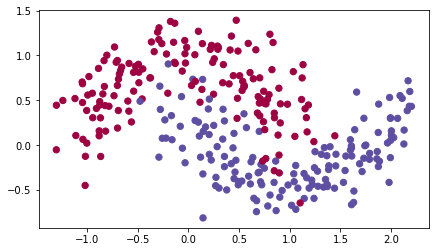

In [21]:
train_X, train_Y = load_dataset()

Chúng tôi đã triển khai mạng nơ-ron 3 lớp. Bạn sẽ đào tạo nó với:

**Gradient Descent** theo lô nhỏ : nó sẽ gọi hàm của bạn:

   * update_parameters_with_gd()
   
**Momentum** lô nhỏ : nó sẽ gọi các hàm của bạn:

   * initialize_velocity() và update_parameters_with_momentum()
    
**Adam** loạt nhỏ : nó sẽ gọi các hàm của bạn:

   * initialize_adam() và update_parameters_with_adam()

In [22]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Bây giờ bạn sẽ chạy mạng nơ-ron 3 lớp này với mỗi phương pháp trong số 3 phương pháp tối ưu hóa.

<a name='6-1'></a>  
### 6.1 - Mini-Batch Gradient Descent
Chạy mã sau để xem mô hình hoạt động như thế nào với giảm độ dốc theo lô nhỏ.

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367


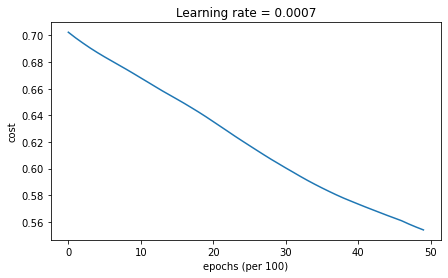

Accuracy: 0.7166666666666667


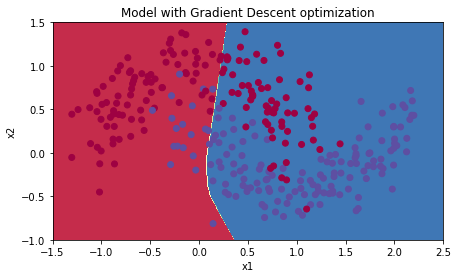

In [23]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-2'></a>  
### 6.2 - Mini-Batch Gradient Descent with Momentum
Chạy đoạn mã sau để xem mô hình hoạt động như thế nào với động lượng. Bởi vì ví dụ này tương đối đơn giản, lợi ích từ việc sử dụng momemtum là nhỏ; nhưng đối với các vấn đề phức tạp hơn, bạn có thể thấy lợi ích lớn hơn.

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444


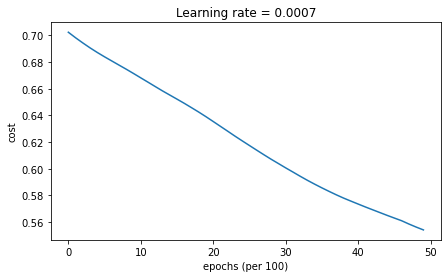

Accuracy: 0.7166666666666667


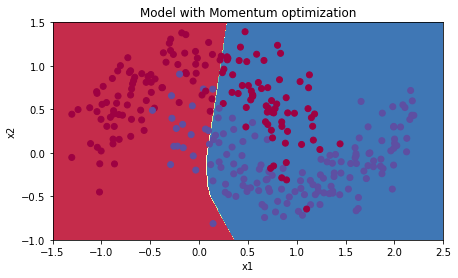

In [24]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-3'></a>  
### 6.3 - Mini-Batch with Adam

Chạy đoạn mã sau để xem mô hình hoạt động như thế nào với Adam.

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066


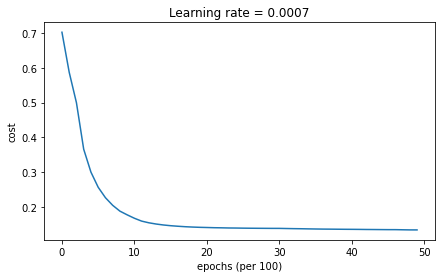

Accuracy: 0.9433333333333334


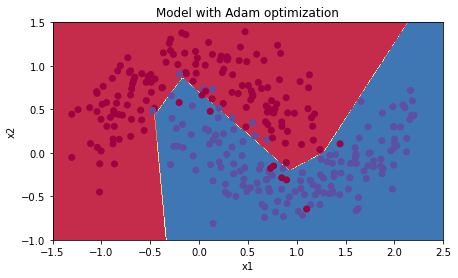

In [25]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='6-4'></a>  
### 6.4 - Summary

<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
        <td>
        <b>cost shape</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        >71%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        >71%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        >94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table>
Momentum thường hữu ích, nhưng với tốc độ học tập nhỏ và tập dữ liệu đơn giản, tác động của nó gần như không thể bỏ qua. Ngoài ra, những dao động lớn mà bạn thấy trong chi phí đến từ thực tế là một số minibatch khó hơn những chiếc khác đối với thuật toán tối ưu hóa.

Mặt khác, Adam rõ ràng vượt trội hơn hẳn so với giảm độ dốc theo lô nhỏ và Momentum. Nếu bạn chạy mô hình cho nhiều kỷ nguyên hơn trên tập dữ liệu đơn giản này, cả ba phương pháp sẽ dẫn đến kết quả rất tốt. Tuy nhiên, bạn đã thấy rằng Adam hội tụ nhanh hơn rất nhiều.

Một số ưu điểm của Adam bao gồm:

Yêu cầu bộ nhớ tương đối thấp (mặc dù cao hơn so với giảm độ dốc và giảm độ dốc theo động lượng)
Thường hoạt động tốt ngay cả khi điều chỉnh ít siêu tham số (ngoại trừ  α )
Tài liệu tham khảo :

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf

<a name='7'></a>  
## 7 - Learning Rate Decay and Scheduling
Cuối cùng, tốc độ học là một siêu thông số khác có thể giúp bạn tăng tốc độ học.

Trong phần đầu tiên của quá trình đào tạo, mô hình của bạn có thể thoát khỏi việc thực hiện các bước lớn, nhưng theo thời gian, việc sử dụng một giá trị cố định cho tốc độ học alpha có thể khiến mô hình của bạn bị mắc kẹt trong một dao động rộng không bao giờ hội tụ. Nhưng nếu bạn từ từ giảm tốc độ học alpha của mình theo thời gian, thì bạn có thể thực hiện các bước nhỏ hơn, chậm hơn để đưa bạn đến gần mức tối thiểu nhất. Đây là ý tưởng đằng sau sự suy giảm tỷ lệ học tập.

Việc giảm tốc độ học tập có thể đạt được bằng cách sử dụng các phương pháp thích ứng hoặc lịch trình tốc độ học tập được xác định trước.

Bây giờ, bạn sẽ áp dụng phân rã tốc độ học theo lịch trình cho mạng nơ-ron 3 lớp ở ba chế độ trình tối ưu hóa khác nhau và xem mỗi chế độ khác nhau như thế nào, cũng như tác động của việc lập lịch ở các thời kỳ khác nhau.

Mô hình này về cơ bản giống với mô hình bạn đã sử dụng trước đây, ngoại trừ mô hình này, bạn sẽ có thể bao gồm giảm tốc độ học tập. Nó bao gồm hai tham số mới, phân rã và tốc độ phân rã.

In [26]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay=None, decay_rate=1):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    lr_rates = []
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

<a name='7-1'></a>  
### 7.1 - Decay on every iteration 
Đối với phần này của bài tập, bạn sẽ thử một trong các lịch trình được xác định trước để giảm tốc độ học tập, được gọi là giảm tốc độ học tập theo cấp số nhân. Nó có dạng toán học sau:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

<a name='ex-7'></a>  
### Exercise 7 - update_lr
Tính tỷ lệ học tập mới bằng cách sử dụng phân rã trọng lượng theo cấp số nhân.

In [28]:
# GRADED FUNCTION: update_lr

def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    #(approx. 1 line)
    learning_rate = (1/(1+decay_rate*epoch_num))*learning_rate0
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    return learning_rate

In [30]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)



Original learning rate:  0.5
Updated learning rate:  0.16666666666666666


Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.688465
learning rate after epoch 1000: 0.000000
Cost after epoch 2000: 0.688465
learning rate after epoch 2000: 0.000000
Cost after epoch 3000: 0.688465
learning rate after epoch 3000: 0.000000
Cost after epoch 4000: 0.688465
learning rate after epoch 4000: 0.000000


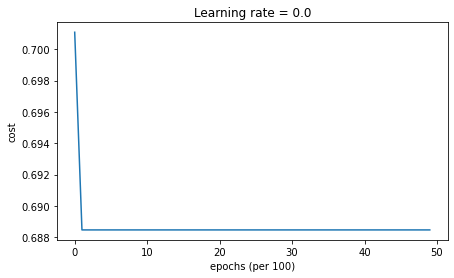

Accuracy: 0.63


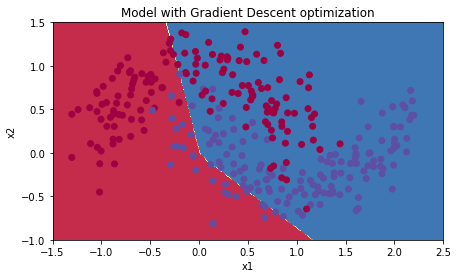

In [31]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=update_lr)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Lưu ý rằng nếu bạn đặt phân rã xảy ra ở mỗi lần lặp, tốc độ học tập sẽ về 0 quá nhanh - ngay cả khi bạn bắt đầu với tốc độ học tập cao hơn.
<table> 
    <tr>
        <td>
        <b>Epoch Number</b>
        </td>
        <td>
        <b>Learning Rate</b>
        </td>
        <td>
        <b>Cost</b>
        </td>
    </tr>
        <td>
        0
        </td>
        <td>
        0.100000
        </td>
        <td>
        0.701091
        </td>
    <tr>
        <td>
        1000
        </td>
        <td>
        0.000000
        </td>
        <td>
        0.688465
        </td>
    </tr>
        <td>
        2000
        </td>
        <td>
        0.000000
        </td>
        <td>
        0.688465
        </td>
    <tr>
        <td>
        3000
        </td>
        <td>
        0.000000
        </td>
        <td>
        0.688465
        </td>
    <tr>
        <td>
        4000
        </td>
        <td>
        0.000000
        </td>
        <td>
        0.688465
        </td>
    <tr>
        <td>
        5000
        </td>
        <td>
        0.000000
        </td>
        <td>
        0.688465
        </td>
    </tr>
</table> 
Khi bạn đang đào tạo trong một vài kỷ nguyên, điều này không gây ra nhiều khó khăn, nhưng khi số lượng kỷ nguyên lớn, thuật toán tối ưu hóa sẽ ngừng cập nhật. Một cách khắc phục phổ biến cho vấn đề này là giảm tốc độ học tập sau mỗi vài bước. Đây được gọi là lập lịch theo khoảng thời gian cố định.

<a name='7-2'></a> 
### 7.2 - Fixed Interval Scheduling
Bạn có thể giúp ngăn tốc độ học tập xuống 0 quá nhanh bằng cách lập lịch trình giảm tốc độ học tập theo cấp số nhân vào một khoảng thời gian cố định, ví dụ: 1000. Bạn có thể đánh số các khoảng thời gian hoặc chia kỷ nguyên cho khoảng thời gian, đó là kích thước của cửa sổ với tỷ lệ học tập không đổi.

<img src="images/lr.png" style="width:400px;height:250px;">
    

<a name='ex-8'></a> 
### Exercise 8 - schedule_lr_decay
Tính toán tỷ lệ học tập mới bằng cách sử dụng phân rã trọng lượng theo cấp số nhân với lập lịch theo khoảng thời gian cố định.

**Hướng dẫn**: Thực hiện lập lịch tốc độ học tập sao cho nó chỉ thay đổi khi epochNum là bội số của timeInterval. 
$$\alpha = \frac{1}{1 + decayRate \times \frac{epochNum}{timeInterval}} \alpha_{0}$$

In [32]:
# GRADED FUNCTION: schedule_lr_decay

def schedule_lr_decay(learning_rate, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    # (approx. 2 lines)
    if epoch_num%time_interval==0:
        learning_rate = (1/(1+decay_rate*(epoch_num/time_interval)))*learning_rate
    # YOUR CODE STARTS HERE
    
    
    # YOUR CODE ENDS HERE
    return learning_rate

In [34]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 1
time_interval = 100
learning_rate_1 = schedule_lr_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_lr_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)



Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.25


<a name='7-3'></a> 
### 7.3 - Using Learning Rate Decay for each Optimization Method
Dưới đây, bạn sẽ sử dụng tập dữ liệu "mặt trăng" sau để kiểm tra các phương pháp tối ưu hóa khác nhau. (Tập dữ liệu được đặt tên là "mặt trăng" vì dữ liệu từ mỗi lớp trong hai lớp trông giống như mặt trăng hình lưỡi liềm.)
<a name='7-3-1'></a> 
#### 7.3.1 - Gradient Descent with Learning Rate Decay
Chạy đoạn mã sau để xem mô hình giảm độ dốc và trọng lượng giảm xuống như thế nào.

Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.127161
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.120304
learning rate after epoch 2000: 0.016667
Cost after epoch 3000: 0.117005
learning rate after epoch 3000: 0.004167
Cost after epoch 4000: 0.116573
learning rate after epoch 4000: 0.000833


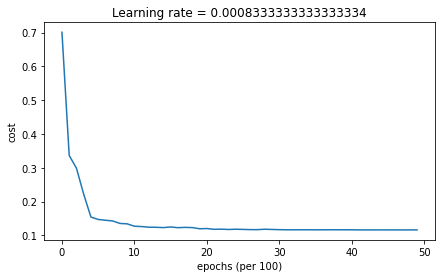

Accuracy: 0.9433333333333334


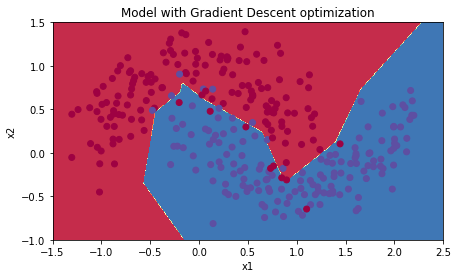

In [35]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-2'></a> 
#### 7.3.2 - Gradient Descent with Momentum and Learning Rate Decay
Chạy đoạn mã sau để xem cách mô hình giảm dần độ dốc với động lượng và trọng lượng phân rã.

Cost after epoch 0: 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.125965
learning rate after epoch 2000: 0.016667
Cost after epoch 3000: 0.123710
learning rate after epoch 3000: 0.004167
Cost after epoch 4000: 0.123437
learning rate after epoch 4000: 0.000833


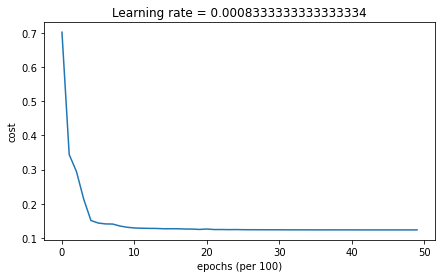

Accuracy: 0.9433333333333334


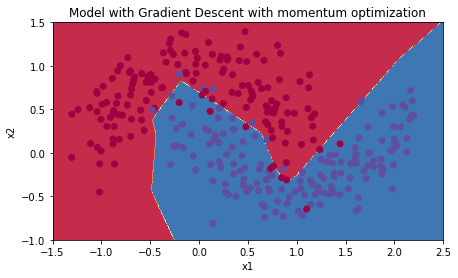

In [36]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-3-3'></a> 
#### 7.3.3 - Adam with Learning Rate Decay
Chạy đoạn mã sau để xem mô hình Adam và trọng lượng phân rã như thế nào.


Cost after epoch 0: 0.699346
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.130074
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.129826
learning rate after epoch 2000: 0.001667
Cost after epoch 3000: 0.128400
learning rate after epoch 3000: 0.000417
Cost after epoch 4000: 0.127873
learning rate after epoch 4000: 0.000083


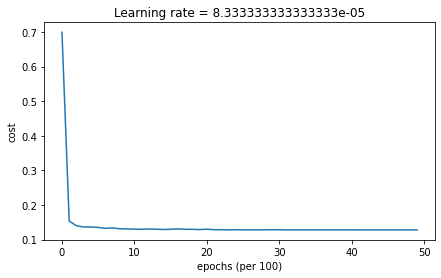

Accuracy: 0.94


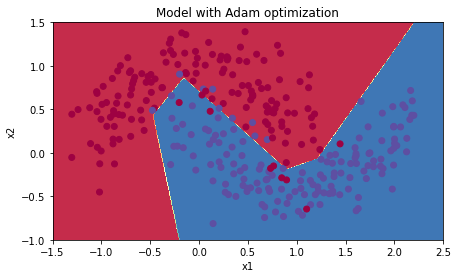

In [37]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<a name='7-4'></a> 
### 7.4 - Achieving similar performance with different methods
Với SGD hoặc SGD với Momentum, độ chính xác thấp hơn đáng kể so với Adam, nhưng khi phân rã tốc độ học được thêm lên trên, có thể đạt được hiệu suất ở tốc độ và điểm chính xác tương tự như Adam.

Trong trường hợp của Adam, hãy lưu ý rằng đường cong học tập đạt được độ chính xác tương tự nhưng nhanh hơn.
<table> 
    <tr>
        <td>
        <b>optimization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        94.3%
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        94.3%
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
    </tr>
</table> 

**Xin chúc mừng**! Bạn đã đến phần cuối của sổ ghi chép phương pháp Tối ưu hóa. Đây là bản tóm tắt nhanh về mọi thứ bạn có thể làm:

* Áp dụng ba phương pháp tối ưu hóa khác nhau cho các mô hình của bạn
* Xây dựng các lô nhỏ cho bộ đào tạo của bạn
* Sử dụng lập lịch trình giảm tốc độ học tập để tăng tốc quá trình đào tạo của bạn

Công việc tuyệt vời!